<a href="https://colab.research.google.com/github/tohnperfect/data_viz_2022/blob/main/Visualize_Map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ref: https://www.analyticsvidhya.com/blog/2020/06/guide-geospatial-analysis-folium-python/

ref2: https://towardsdatascience.com/choropleth-maps-with-folium-1a5b8bcdd392

# ทำงานกับ Map

In [1]:
!pip install folium

In [3]:
import folium # package สำหรับ visualize interactive map

In [4]:
m=folium.Map(location=[16.4743, 102.8222])
m

In [5]:
from branca.element import Figure  # จัดการขนาดของ map

In [6]:
fig=Figure(width=550,height=350)

In [7]:
m=folium.Map(location=[16.4743, 102.8222]) #latitude , longitude
fig.add_child(m)

### zoom start เลือกขนาด zoom ตอนเริ่มแสดง

In [12]:
fig2=Figure(width=550,height=350)
mt=folium.Map(location=[13.5000, 100.9925],zoom_start=4.5)
fig2.add_child(mt)

### tile เปลี่ยนหน้าตาแผนที่

In [15]:
fig2=Figure(width=550,height=350)
mt=folium.Map(location=[13.5000, 100.9925],zoom_start=8,tiles='cartodbdark_matter')
fig2.add_child(mt)

### ปักจุดลงบนแผนที่

In [28]:
fig2=Figure(width=550,height=350)

mt=folium.Map(location=[16.4743, 102.8222],zoom_start=14)
folium.Marker(location=[16.47447720294497, 102.8230673655105],popup='SC06',tooltip='Science').add_to(mt) # mouse over = tooltip, click = popup

fig2.add_child(mt)



### save as html

In [29]:
mt.save('map.html')

# ทำงานกับ geographic data

https://drive.google.com/drive/folders/1859xMbSFaoFtecA8eDaZyJAJId0g6Evz?usp=sharing

In [30]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 4.0 MB/s 
     |████████████████████████████████| 16.7 MB 318 kB/s 
     |████████████████████████████████| 6.3 MB 46.5 MB/s 


In [31]:
import geopandas # For working with geographical data
import pandas as pd

In [33]:
th_geojson=geopandas.read_file('/content/drive/MyDrive/DataViz22_data/thai.json')
th_geojson.head()

,name,geometry
0,Mae Hong Son,"POLYGON ((98.47780 19.70563, 98.48260 19.66410..."
1,Chumphon,"POLYGON ((99.50343 10.99705, 99.51157 10.86636..."
2,Nakhon Si Thammarat,"POLYGON ((100.12963 7.80172, 100.04457 7.82446..."
3,Phuket,"POLYGON ((98.41863 7.90375, 98.43165 7.91743, ..."
4,Phang-nga,"MULTIPOLYGON (((98.53631 8.11514, 98.60239 8.0..."


In [34]:
th_geojson

,name,geometry
0,Mae Hong Son,"POLYGON ((98.47780 19.70563, 98.48260 19.66410..."
1,Chumphon,"POLYGON ((99.50343 10.99705, 99.51157 10.86636..."
2,Nakhon Si Thammarat,"POLYGON ((100.12963 7.80172, 100.04457 7.82446..."
3,Phuket,"POLYGON ((98.41863 7.90375, 98.43165 7.91743, ..."
4,Phang-nga,"MULTIPOLYGON (((98.53631 8.11514, 98.60239 8.0..."
...,...,...
72,Nakhon Phanom,"POLYGON ((104.75791 16.81889, 104.73452 16.804..."
73,Mukdahan,"POLYGON ((104.75791 16.81889, 104.77901 16.704..."
74,Narathiwat,"POLYGON ((101.72350 6.57438, 101.80836 6.46454..."
75,Pattani,"POLYGON ((101.72350 6.57438, 101.67837 6.57712..."


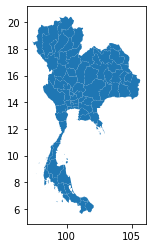

In [35]:
th_geojson.plot()

In [36]:
th_geojson[th_geojson['name']=='Khon Kaen']

,name,geometry
61,Khon Kaen,"POLYGON ((103.11312 16.91282, 103.13420 16.885..."


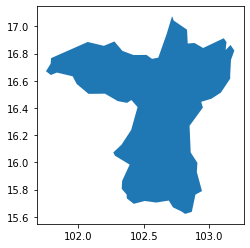

In [31]:
th_geojson[th_geojson['name']=='Khon Kaen'].plot()

In [37]:
data = [{'prov':'Khon Kaen','val':12},
        {'prov':'Udon Thani','val':20},
        {'prov':'Nakhon Ratchasima','val':6}   
]
pddf = pd.DataFrame(data)
pddf

,prov,val
0,Khon Kaen,12
1,Udon Thani,20
2,Nakhon Ratchasima,6


In [40]:
from pandas._libs.lib import map_infer

fig2=Figure(width=550,height=350)
map=folium.Map(location=[13.5000, 100.9925],zoom_start=4.5)

## วาด geographical data ลงบนแผนที่
map.choropleth(
    geo_data=th_geojson,
    data=pddf,
    columns=['prov', 'val'],
    key_on='feature.properties.name',
    fill_color='Spectral', 
    fill_opacity=0.6, 
    line_opacity=1,
    legend_name='random number',
    smooth_factor=0)

fig2.add_child(map)

/usr/local/lib/python3.7/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


colorcode for choropleth ref: https://rdrr.io/cran/RColorBrewer/man/ColorBrewer.html